## Kaggle Project

# Classify gestures by reading muscle activity

url: https://www.kaggle.com/datasets/kyr7plus/emg-4/

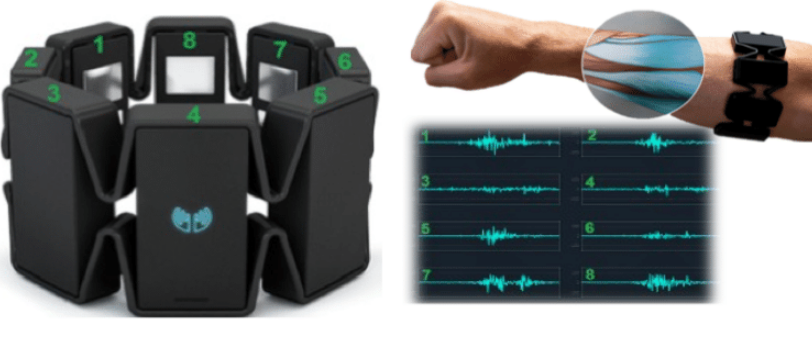

Picture source: "Stepping-stones to Transhumanism: An EMG-controlled Low-cost Prosthetic Hand for Academia"
 (9th IEEE International Conference on Intelligent Systems, 2018)

## Task:

#### ENG: 

This data is based on the data from a myoelectric sensor, known as MYO. MYO has eight sensors arranged to measure the movement generated in the muscles beneath the attached surface.

- Each line in the data set contains values for all eight sensors, and since each sensor has eight values, it consists of 64 columns. 
- The 65th column classifies the gesture produced through this, with rock = 0, scissors = 1, paper = 2, ok = 3. Thus, it is structured as [8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][GESTURE_CLASS].

Since the data I have prepared has predefined answers, it falls under supervised learning and I will use multi-class classification to classify the 64 sensor values, the X data, into one of the four gestures: rock, scissors, paper, and ok. For this, I plan to use the Logistic Regression, Decision Tree, and SVC algorithms that we learned in class. I will analyze each algorithm in terms of accuracy and the time it takes to learn.

Moreover, even for the same algorithm, I will set different parameters for each algorithm: for Logistic Regression, I will use different solvers; for Decision Tree, I will adjust the depth; and for SVC, I will use different kernels. I plan to train with nine different cases, three for each algorithm.

#### KOR: 

이 데이터는 MYO라고 불리는 근전도 센서의 데이터를 바탕으로 만들어진 데이터입니다. MYO는 8개의 센서가 배치되어 있으며 각 센서는 부착된 표면 아래 근육에서 생성되는 움직임을 측정합니다. 

- 데이터 세트 라인에는 8개 센서 모두에 대한 값이 있으며 각 센서마다 8개의 값을 지니고 있기에 64개의 열로 이루어져 있습니다. 
- 65번째 열에는 이를 통해 만들어진 동작의 값이 분류되어 있는데 rock = 0, scissors = 1, paper = 2, ok = 3입니다. 

즉 [8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][GESTURE_CLASS] 이러한 형태로 구성되어 있습니다. 

제가 준비한 데이터는 정해진 답이 있으니 지도학습에 속하며 답이 4가지이니 다중 분류를 사용하여 64개의 센서 값인 X 데이터가 rock,  sissor, paper and ok 중에 어느 제스처에 속하는지 분류하면 됩니다. 
이를 위해 수업에서 배웠던 Logistic Regression, Decession Tree, SVC를 사용해보며 각 알고리즘 마다 정확도와 학습에 소요되는 시간으로 분석해볼 예정입니다. 또한 같은 알고리즘이라 하더라도 Logistic Regression은 solver를 다르게 설정해서 학습을 시켜보고, Decession Tree는 Depth를 다르게, SVC는 Kernel을 다르게 해여 각 3개씩 9가지의 경우로 학습시켜보고자 합니다

## Datasets:

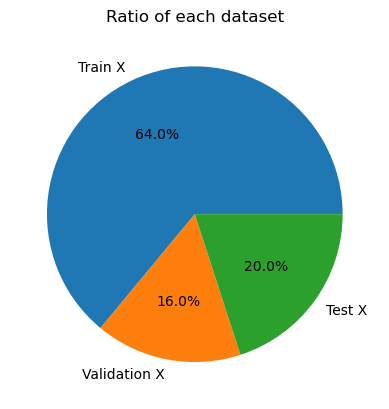

- Train X: (7473,64), Train Y: (7473,1)
- Validation X: (1869,64), Validation Y: (1869,1)
-Test X: (2336,64), Test Y: (2336,1)

## Features(x):

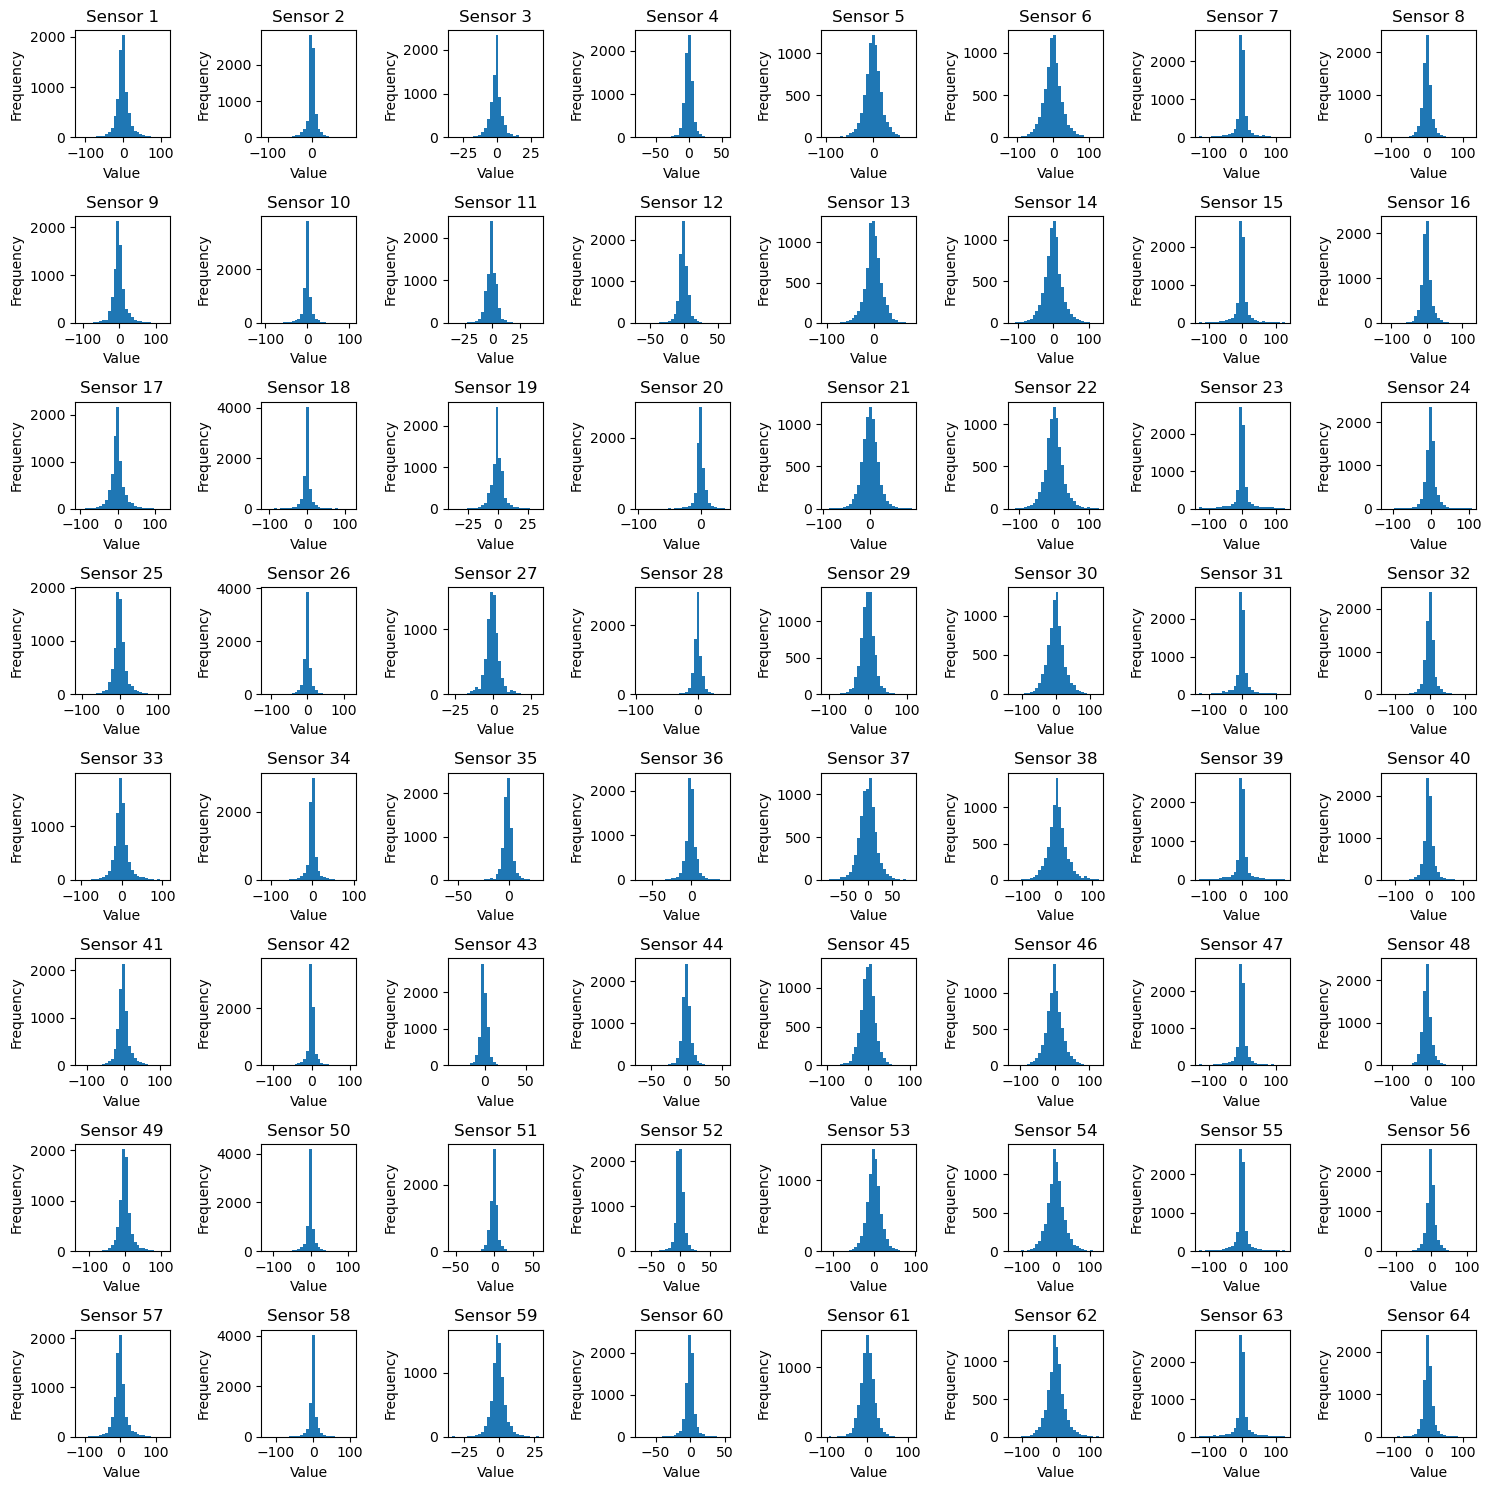

- Electromyography sensor values from 0 to 63 for a single gesture

## Target(y):

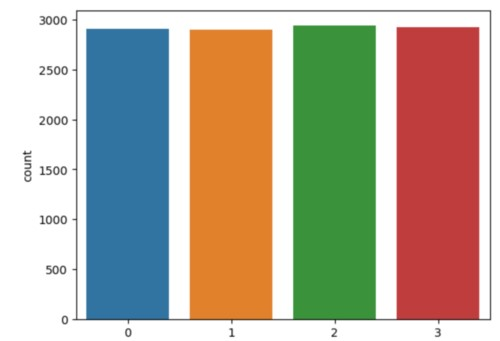

- rock = 0
- scissors = 1
- paper = 2
- ok = 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

### Loading the data

In [2]:
rock_pos=pd.read_csv('0.csv', header=None)
scis_pos=pd.read_csv('1.csv', header=None)
paper_pos=pd.read_csv('2.csv', header=None)
ok_pos=pd.read_csv('3.csv', header=None)

### Data shape

In [3]:
rock_pos.shape

(2910, 65)

In [4]:
scis_pos.shape

(2903, 65)

In [5]:
paper_pos.shape

(2943, 65)

In [6]:
ok_pos.shape

(2922, 65)

### Visualizing a subset of the data Data

The 64th column of each data is classified into 0, 1, 2, 3.

=> The 64th column should be set as y to proceed with the training.



In [7]:
rock_pos.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [8]:
scis_pos.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-7.0,-1.0,-1.0,0.0,-10.0,-10.0,-1.0,1.0,-5.0,-5.0,...,6.0,-4.0,-3.0,-5.0,-3.0,15.0,11.0,-4.0,-5.0,1
1,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
2,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
3,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
4,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1


In [9]:
ok_pos.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-22.0,-9.0,-6.0,-1.0,21.0,26.0,-2.0,5.0,5.0,0.0,...,-10.0,-15.0,-6.0,-3.0,3.0,20.0,25.0,1.0,1.0,3
1,-7.0,0.0,1.0,0.0,-13.0,-18.0,0.0,-9.0,-6.0,-2.0,...,-1.0,11.0,-4.0,-5.0,-4.0,3.0,-8.0,-7.0,-3.0,3
2,-6.0,-6.0,-6.0,-8.0,25.0,43.0,-4.0,7.0,6.0,1.0,...,3.0,2.0,1.0,3.0,-1.0,1.0,9.0,4.0,4.0,3
3,2.0,1.0,1.0,1.0,0.0,-23.0,2.0,-6.0,-1.0,-2.0,...,16.0,-3.0,-1.0,-1.0,-3.0,0.0,-3.0,4.0,3.0,3
4,0.0,3.0,4.0,5.0,1.0,25.0,-9.0,0.0,0.0,1.0,...,1.0,6.0,2.0,1.0,-3.0,-20.0,-42.0,-4.0,2.0,3


### Combining rock_pos, scis_pos, paper_pos, ok_pos data

In [10]:
df=pd.concat([rock_pos,scis_pos,paper_pos,ok_pos])

In [11]:
df.shape

(11678, 65)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


### X,Y Data

Set X data up to 63rd column

In [13]:
X=df.drop([64],axis=1)

In [14]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0


<AxesSubplot:xlabel='64', ylabel='count'>

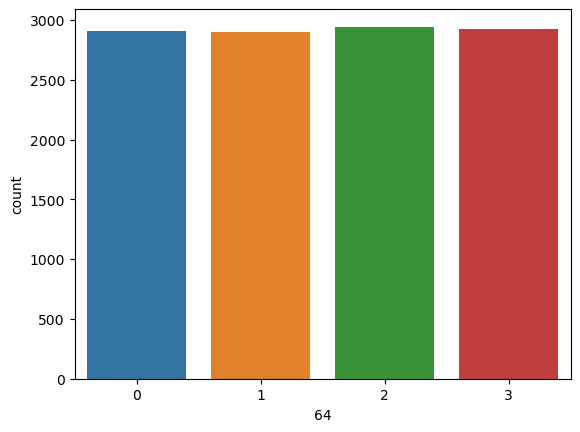

In [15]:
sns.countplot(x=64,data=df)

Setting the 64th column as Y data

In [16]:
Y=df.drop(df.index[0:64],axis=1)

In [17]:
Y.head()

,64
0,0
1,0
2,0
3,0
4,0


### Train / Validation / Test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
tr_x,ts_x, tr_y, ts_y = train_test_split(X,Y, test_size = 0.2 ,random_state = 48)

In [20]:
tr_x, val_x, tr_y, val_y = train_test_split(tr_x, tr_y, test_size=0.2, random_state=1)

#### Train dataset

- Train X: (7473,64)

- Train Y: (7473,1)

#### Validation dataset

- Validation X: (1869,64)

- Validation: (1869,1)

#### Test dataset

- Test X: (2336,64)
- Test Y: (2336,1)

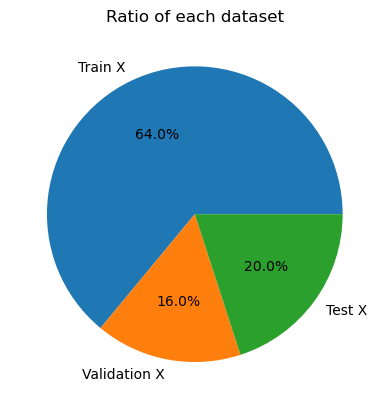

In [21]:
import matplotlib.pyplot as plt

train_x = 7473
validation_x = 1869
test_x = 2336

total = train_x + validation_x + test_x

train_ratio = (train_x / total) * 100
validation_ratio = (validation_x / total) * 100
test_ratio = (test_x / total) * 100

data = [train_ratio, validation_ratio, test_ratio]
labels = ['Train X', 'Validation X', 'Test X']

plt.pie(data, labels = labels, autopct = '%1.1f%%')
plt.title('Ratio of each dataset')
plt.show()


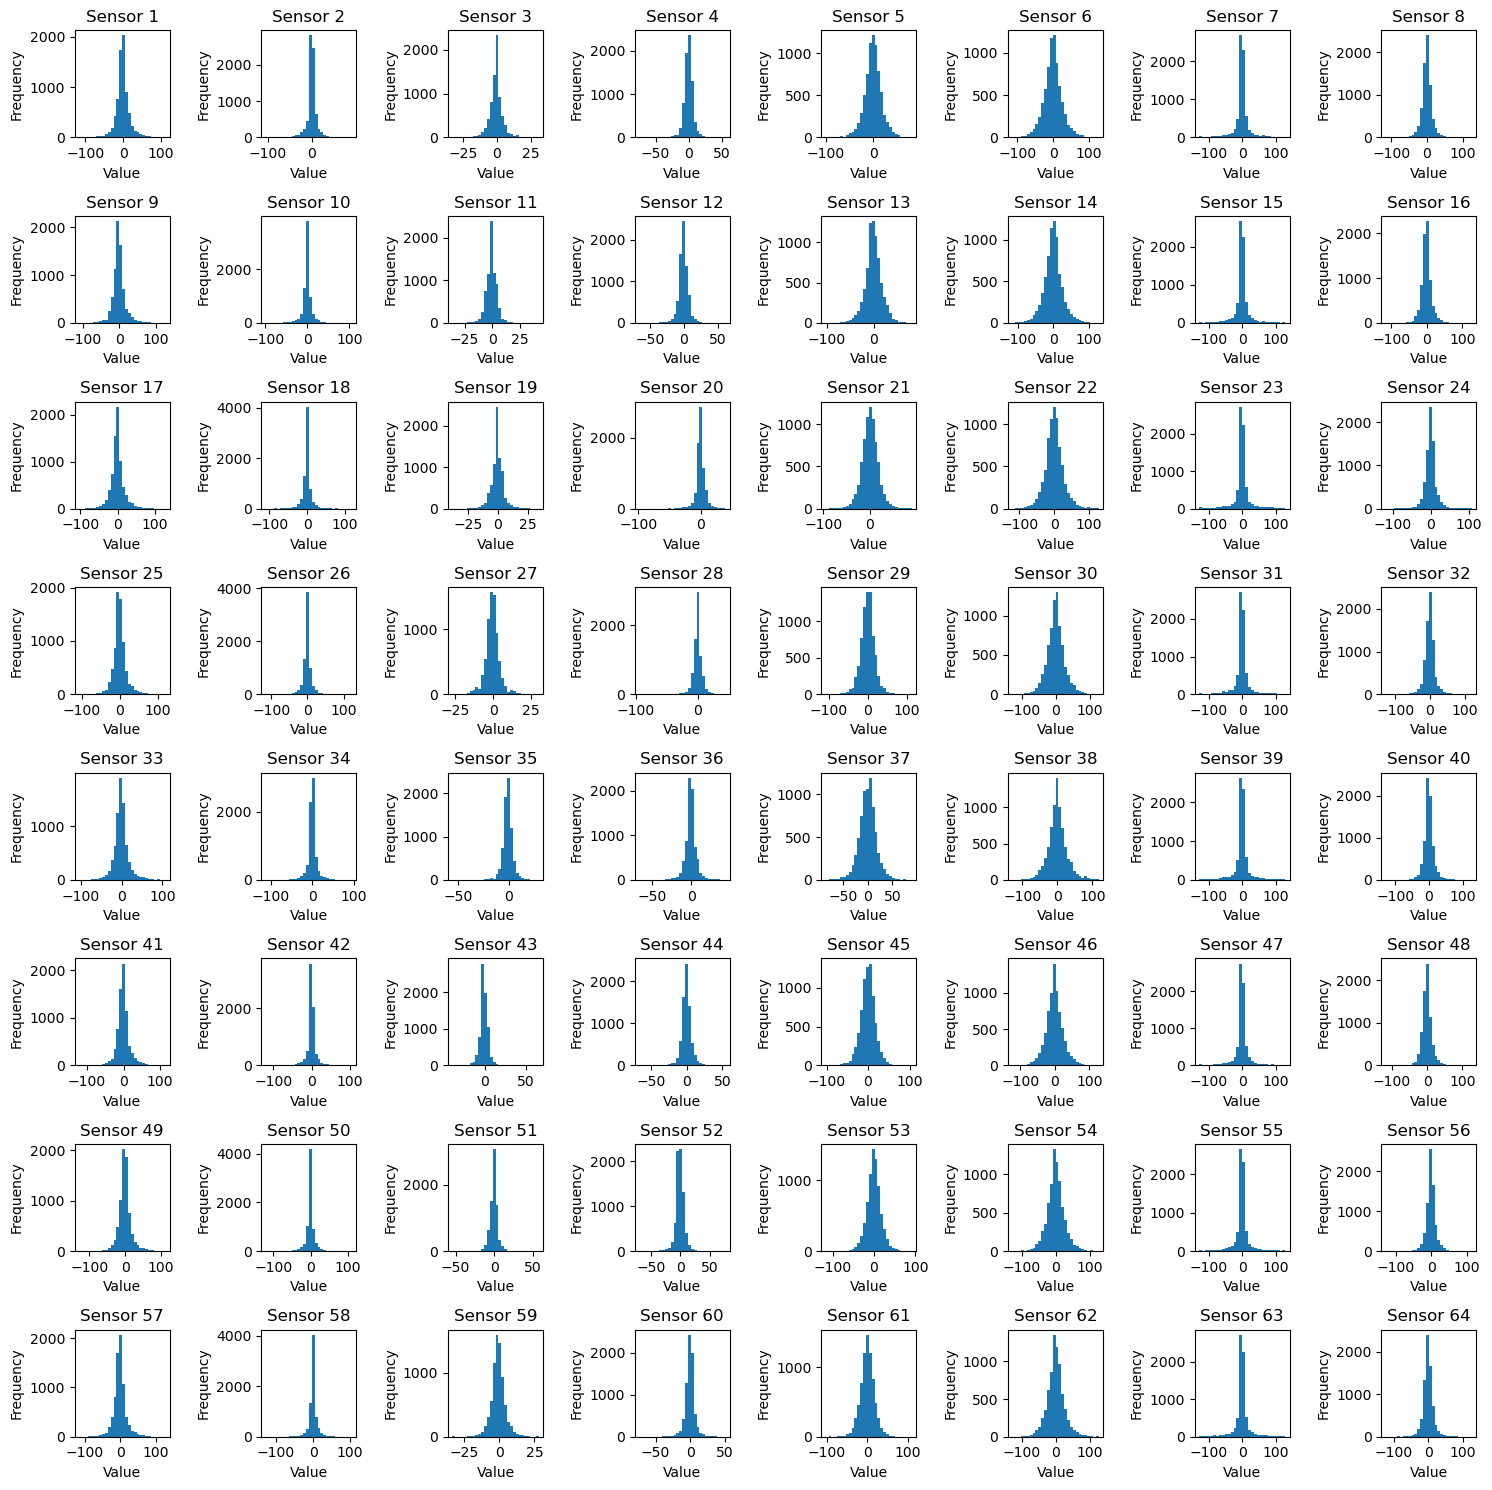

In [22]:
import matplotlib.pyplot as plt

num_features_to_display = 64 
num_rows = 8
num_cols = 8

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    if i < num_features_to_display:
        ax.hist(tr_x.iloc[:, i], bins=30) 
        ax.set_title(f'Sensor {i+1}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    else:
        ax.axis('off') 
plt.tight_layout()
plt.show()

In [23]:
from sklearn.decomposition import PCA

# Use PCA to convert data to two dimensions
pca = PCA(n_components=2)
tr_x_pca = pca.fit_transform(tr_x.iloc[:, :63])

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
def accuracy(pre, y):
    return sum(pre==y)/len(y)

#### Solver = lbfgs

In [26]:
model_lr = LogisticRegression(fit_intercept=True,
                              multi_class='ovr', 
                              solver='lbfgs',
                              random_state=10) 
start = time.time()
model_lr.fit(tr_x,tr_y)
lr_lbfgs_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
val_lr_lbfgs_acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("Logistic Regression validation Data Acc(solver=lbfgs):",val_lr_lbfgs_acc)
pre_y=model_lr.predict(ts_x)
lr_lbfgs_acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("Logistic Regression Test Data Acc(solver=lbfgs):",lr_lbfgs_acc)

C:\Users\yc991\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

Logistic Regression validation Data Acc(solver=lbfgs): 0.3306581059390048
Logistic Regression Test Data Acc(solver=lbfgs): 0.3595890410958904


C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Solver = newton-cg

In [27]:
model_lr = LogisticRegression(fit_intercept=True,
                              multi_class='ovr', 
                              solver='newton-cg',
                              random_state=10) 
start = time.time()
model_lr.fit(tr_x,tr_y)
lr_newton_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
val_lr_newton_acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("Logistic Regression validation Data Acc(solver=newton-cg):",val_lr_newton_acc)

pre_y=model_lr.predict(ts_x)
lr_newton_acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("Logistic Regression Test Data Acc(solver=newton-cg):",lr_newton_acc)

C:\Users\yc991\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression validation Data Acc(solver=newton-cg): 0.3301230604601391
Logistic Regression Test Data Acc(solver=newton-cg): 0.3583047945205479


#### Solver = saga

In [28]:
model_lr = LogisticRegression(fit_intercept=True,
                              multi_class='ovr', 
                              solver='saga',
                              random_state=10) 
start = time.time()
model_lr.fit(tr_x,tr_y)
lr_saga_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
val_lr_saga_acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("Logistic Regression validation Data Acc(solver=saga):",val_lr_saga_acc)

pre_y=model_lr.predict(ts_x)
lr_saga_acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("Logistic Regression Test Data Acc(solver=saga):",lr_saga_acc)

C:\Users\yc991\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression validation Data Acc(solver=saga): 0.3274478330658106
Logistic Regression Test Data Acc(solver=saga): 0.3505993150684932


C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
models = [
    LogisticRegression(multi_class='ovr', solver='lbfgs',random_state=10),
    LogisticRegression(multi_class='ovr', solver='newton-cg',random_state=10),
    LogisticRegression(multi_class='ovr', solver='saga',random_state=10)
]

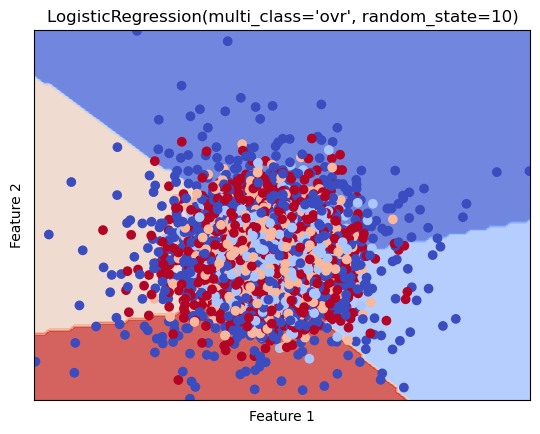

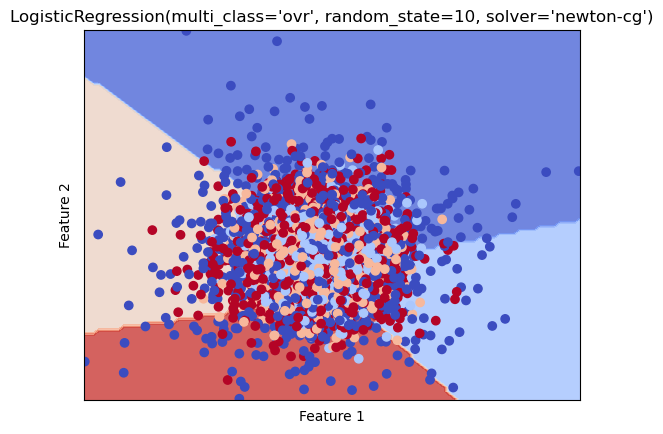

C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yc991\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


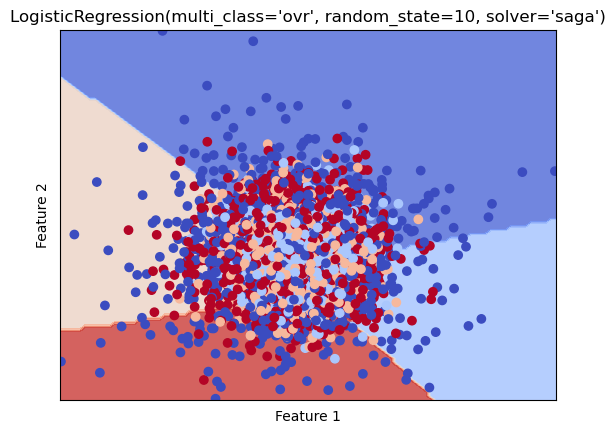

In [30]:
pca = PCA(n_components=2)
tr_x_pca = pca.fit_transform(tr_x.iloc[:, :63])

for model in models:
    model.fit(tr_x_pca, tr_y.values.ravel())

    xx, yy = np.meshgrid(np.linspace(tr_x_pca[:, 0].min()-1, tr_x_pca[:, 0].max()+1, 100),
                         np.linspace(tr_x_pca[:, 1].min()-1, tr_x_pca[:, 1].max()+1, 100))


    pre = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pre = pre.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, pre, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(tr_x_pca[:, 0], tr_x_pca[:, 1], c=tr_y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f'{model}')
    plt.show()


## DecisionTree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

#### Depth = 5

In [56]:
model_dt = DecisionTreeClassifier(criterion='gini',
                                  splitter='best', 
                                  max_depth=5,
                                  random_state=10)
start = time.time()
model_dt.fit(tr_x, tr_y)
DT_5_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
valdepth5acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("Decision Tree validation Data Acc(depth=5):",valdepth5acc)

pre_y=model_dt.predict(ts_x)
depth5acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("Decision Tree Test Data Acc(depth=5):",depth5acc)

Decision Tree validation Data Acc(depth=5): 0.3274478330658106
Decision Tree Test Data Acc(depth=5): 0.6001712328767124


#### Depth = 10

In [57]:
model_dt = DecisionTreeClassifier(criterion='gini',
                                  splitter='best', 
                                  max_depth=10,
                                  random_state=10)
start = time.time()
model_dt.fit(tr_x, tr_y)
DT_10_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
valdepth10acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("Decision Tree validation Data Acc(depth=10):",valdepth10acc)

pre_y=model_dt.predict(ts_x)
depth10acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("Decision Tree Test Data Acc(depth=10):",depth10acc)

Decision Tree validation Data Acc(depth=10): 0.3274478330658106
Decision Tree Test Data Acc(depth=10): 0.7448630136986302


#### Depth = 15

In [58]:
model_dt = DecisionTreeClassifier(criterion='gini',
                                  splitter='best', 
                                  max_depth=15,
                                  random_state=10)
start = time.time()
model_dt.fit(tr_x, tr_y)
DT_15_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
valdepth15acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("Decision Tree validation Data Acc(depth=15):",valdepth15acc)

pre_y=model_dt.predict(ts_x)
depth15acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("Decision Tree Test Data Acc(depth=15):",depth15acc)

Decision Tree validation Data Acc(depth=15): 0.3274478330658106
Decision Tree Test Data Acc(depth=15): 0.769263698630137


In [35]:
models = [
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=10),
    DecisionTreeClassifier(max_depth=15)
]


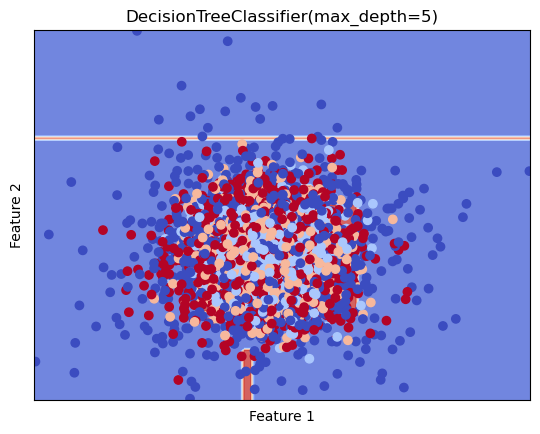

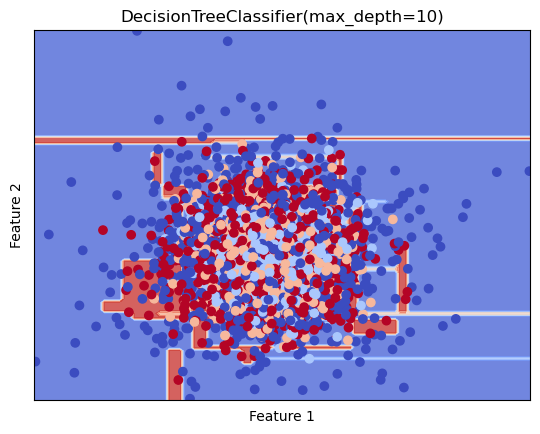

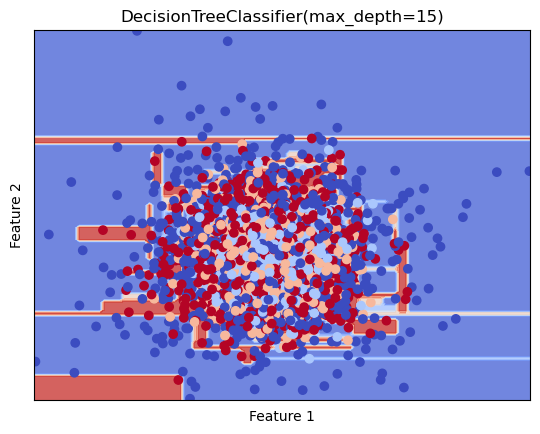

In [36]:
for model in models:
    model.fit(tr_x_pca, tr_y.values.ravel())
    xx, yy = np.meshgrid(np.linspace(tr_x_pca[:, 0].min()-1, tr_x_pca[:, 0].max()+1, 100),
                         np.linspace(tr_x_pca[:, 1].min()-1, tr_x_pca[:, 1].max()+1, 100))
    pre = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pre = pre.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, pre, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(tr_x_pca[:, 0], tr_x_pca[:, 1], c=tr_y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f'{model}')
    plt.show()

## SVC

In [37]:
from sklearn.svm import SVC

#### Kernel = Lienar

In [38]:
model_svc = SVC(C=1.0, kernel='linear', gamma='scale')
start = time.time()
model_svc.fit(tr_x,tr_y)
SVC_linear_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
val_svc_linear_acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("SVC validation Data Acc(kernel=linear):",val_svc_linear_acc)

pre_y=model_svc.predict(ts_x)
svc_linear_acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("SVC Test Data Acc(kernel=linear):",svc_linear_acc)

C:\Users\yc991\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC validation Data Acc(kernel=linear): 0.3274478330658106
SVC Test Data Acc(kernel=linear): 0.3493150684931507


#### Kernel = rbf

In [39]:
model_svc = SVC(C=1.0, kernel='rbf', gamma='scale')
start = time.time()
model_svc.fit(tr_x,tr_y)
SVC_rbf_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
val_svc_rbf_acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("SVC validation Data Acc(kernel=rbf):",val_svc_rbf_acc)

pre_y=model_svc.predict(ts_x)
svc_rbf_acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("SVC Test Data Acc(kernel=rbf):",svc_rbf_acc)

C:\Users\yc991\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC validation Data Acc(kernel=rbf): 0.3274478330658106
SVC Test Data Acc(kernel=rbf): 0.8621575342465754


#### Kernel = poly

In [40]:
model_svc = SVC(C=1.0, kernel='poly', gamma='scale')
start = time.time()
model_svc.fit(tr_x,tr_y)
SVC_poly_time=time.time() - start
pre_val_y=model_lr.predict(val_x)
val_svc_poly_acc=accuracy(pre_val_y,val_y.values.reshape(-1))
print("SVC validation Data Acc(kernel=poly):",val_svc_poly_acc)

pre_y=model_svc.predict(ts_x)
svc_poly_acc=accuracy(pre_y,ts_y.values.reshape(-1))
print("SVC Test Data Acc(kernel=poly):",svc_poly_acc)

C:\Users\yc991\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC validation Data Acc(kernel=poly): 0.3274478330658106
SVC Test Data Acc(kernel=poly): 0.502568493150685


In [41]:
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='poly', degree=3)
]

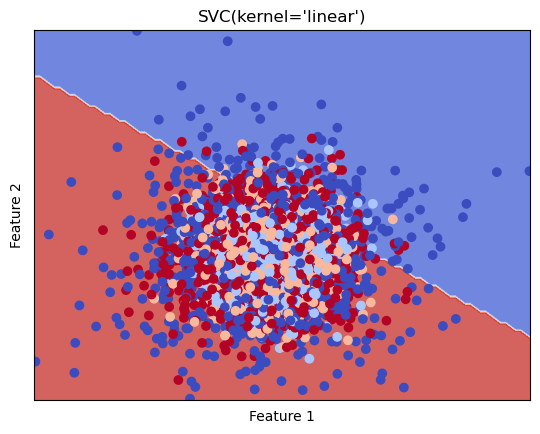

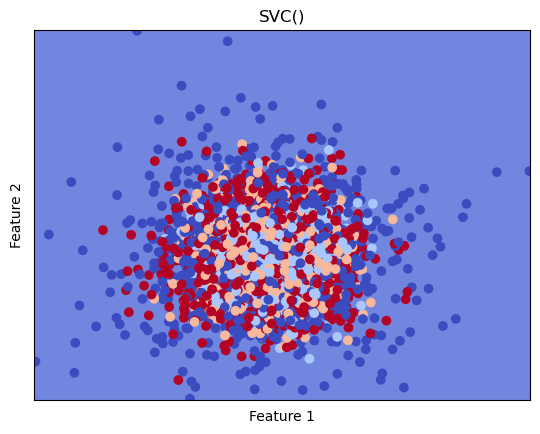

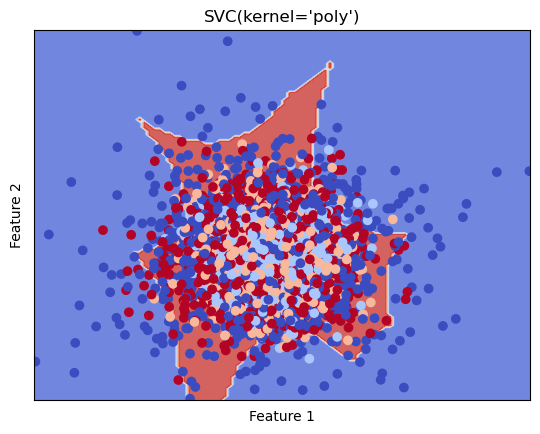

In [42]:
for model in models:
    model.fit(tr_x_pca, tr_y.values.ravel())
    xx, yy = np.meshgrid(np.linspace(tr_x_pca[:, 0].min()-1, tr_x_pca[:, 0].max()+1, 100),
                         np.linspace(tr_x_pca[:, 1].min()-1, tr_x_pca[:, 1].max()+1, 100))
    pre = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pre = pre.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, pre, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(tr_x_pca[:, 0], tr_x_pca[:, 1], c=tr_y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f'{model}')
    plt.show()

# Performance

### Training time required

In [43]:
print('LR(solver=lbfgs) = {:.3f}s \nLR(solver=newton-cg) = {:.3f}s \nLR(solver=saga) = {:.3f}s'.format(lr_lbfgs_time,lr_newton_time,lr_saga_time))

LR(solver=lbfgs) = 0.558s 
LR(solver=newton-cg) = 1.384s 
LR(solver=saga) = 3.426s


In [44]:
print('DT(depth=5) = {:.3f}s \nDT(depth=10) = {:.3f}s \nDT(depth=15) = {:.3f}s'.format(DT_5_time,DT_10_time,DT_15_time))

DT(depth=5) = 0.200s 
DT(depth=10) = 0.410s 
DT(depth=15) = 0.555s


In [45]:
print('SVC(kernel=linear) = {:.3f}s \nSVC(kernel=rbf) = {:.3f}s \nSVC(kernel=poly) = {:.3f}s'.format(SVC_linear_time,SVC_rbf_time,SVC_poly_time))

SVC(kernel=linear) = 2549.535s 
SVC(kernel=rbf) = 1.503s 
SVC(kernel=poly) = 2.632s


### Logistic Regression Accuracy Comparison

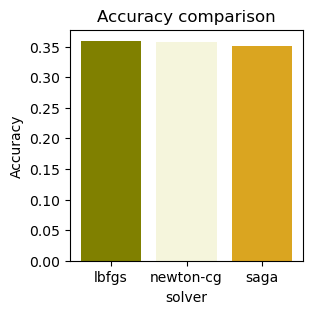

In [53]:
accuracies = [lr_lbfgs_acc,lr_newton_acc,lr_saga_acc]
labels = ['lbfgs', 'newton-cg', 'saga']
plt.bar(labels, accuracies, color=['olive', 'beige', 'goldenrod'])
plt.title('Accuracy comparison')
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.rcParams["figure.figsize"] = (3,3)
plt.show()

### Decession Tree Accuracy Comparison

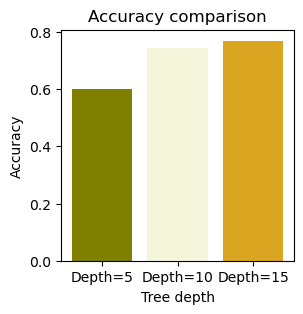

In [47]:
accuracies = [depth5acc, depth10acc, depth15acc]
labels = ['Depth=5', 'Depth=10', 'Depth=15']
plt.bar(labels, accuracies, color=['olive', 'beige', 'goldenrod'])
plt.title('Accuracy comparison')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

### SVC Accuracy Comparison

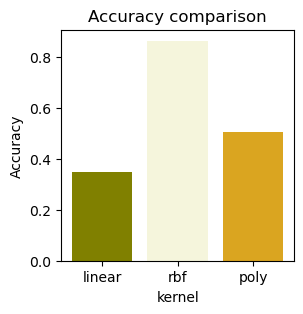

In [48]:
accuracies = [svc_linear_acc, svc_rbf_acc, svc_poly_acc]
labels = ['linear', 'rbf', 'poly']
plt.bar(labels, accuracies, color=['olive', 'beige', 'goldenrod'])
plt.title('Accuracy comparison')
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.show()

### Accuracy comparison of all models

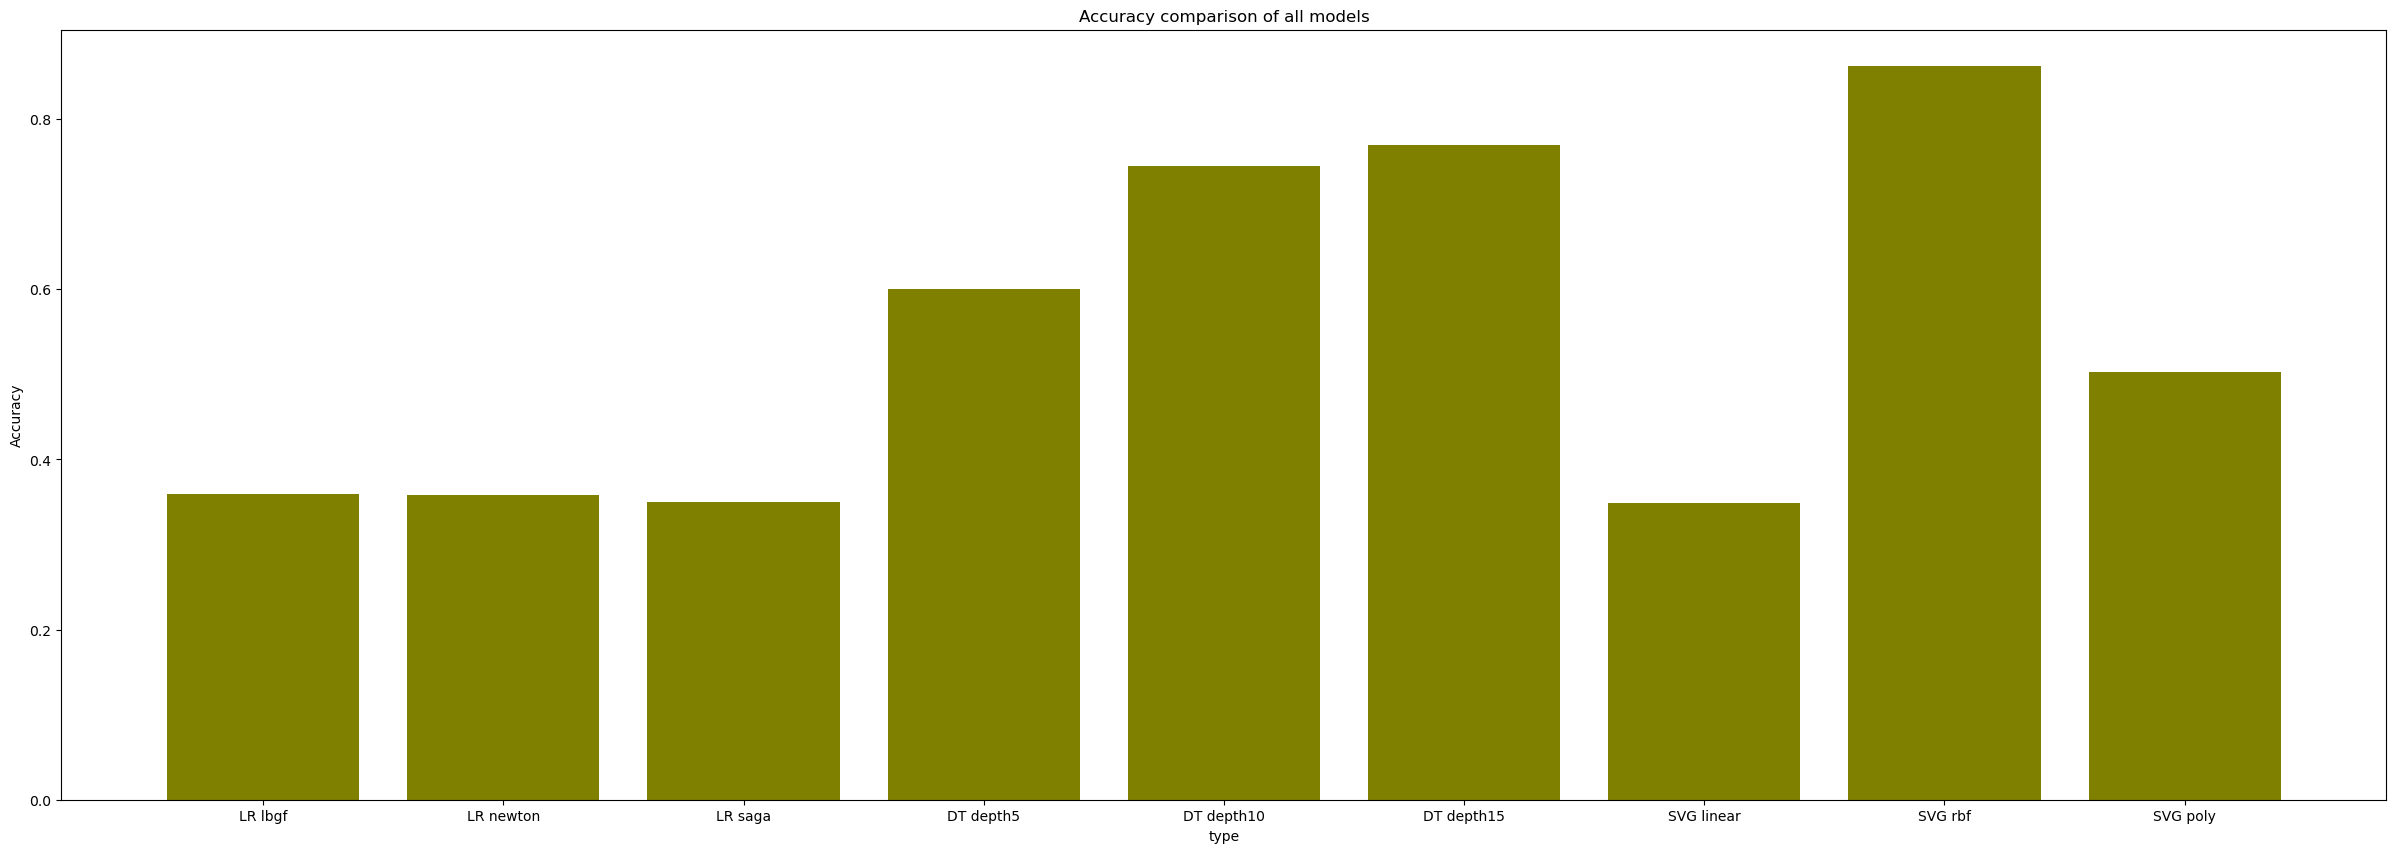

In [55]:
accuracies = [lr_lbfgs_acc,lr_newton_acc,lr_saga_acc,depth5acc, depth10acc, depth15acc,svc_linear_acc, svc_rbf_acc, svc_poly_acc]
labels = ['LR lbgf','LR newton','LR saga','DT depth5','DT depth10','DT depth15','SVG linear', 'SVG rbf', 'SVG poly']
plt.bar(labels, accuracies,color='olive')
plt.title('Accuracy comparison of all models')
plt.xlabel('type')
plt.ylabel('Accuracy')
plt.rcParams["figure.figsize"] = (30,8)
plt.show()

## The results explains

#### ENG:

Various algorithms exist for multi-classification. The three algorithms I used in this project are all content I learned in the Classification lecture of the Machine Learning and Deep Learning course in the second semester of the 23rd academic year.

- The best performing algorithm: SVC(kernel=rbf), acc=0.8621575342465754
- The least performing algorithm: SVC(Kernel=linear), acc=0.3493150684931507
- The algorithm with the shortest learning time: Decision Tree(depth=5), 0.200s
- The algorithm with the longest learning time: SVC(kernel=linear), 2549.535s
- The performance of Logistic Regression was significantly lower compared to the Decision Tree and SVC. Although Logistic Regression has the advantage of being easy to implement and having a fast learning speed, it seems that it is not suitable for use with complex data.
- In the case of the Decision Tree, it was confirmed that the performance improved as the depth increased. Although the results after depth 15 are not shown in this code, the performance was best at depth 15, and after that, the performance decreased again. As the depth increases, it is possible to classify even more segmented data, but there is a risk of overfitting, so it is important to find the optimized depth.
- In the case of SVC, using a non-linear classification, rbf, as the kernel for learning had better performance than using linear, which is a linear classification. I think the non-linear function was more appropriately learned because the data was complex. The downside is that the learning time is longer than Logistic Regression and Decision Tree.

#### KOR:

다중분류를 위해 다양한 알고리즘들이 존재합니다.
이번 프로젝트에서 제가 사용한 3가지 알고리즘은 모두 23학년도 2학기 머신러닝과 딥러닝 수업의 Classification 수업에서 배웠던 내용입니다.

  - 가장 성능이 좋았던 알고리즘: SVC(kernel=rbf), acc=0.8621575342465754

  - 가장 성능이 좋지 않았던 알고리즘: SVC(Kernel=linear),acc=0.3493150684931507

  - 가장 학습 시간이 짧았던 알고리즘: Decisioin Tree(depth=5), 0.200s 

  - 가장 학습 시간이 길었던 알고리즘: SVC(kernel=linear), 2549.535s 

* Logistic Regression은 Decesion Tree, SVC에 비해 성능이 매우 떨어졌습니다. Logistic Regression은 구현하기 쉽고 학습 속도가 빠른 편에 속한다는 장점이 있지만 복잡한 데이터에 사용하기에는 적합하지 않은 것 같습니다. 

* Decesion Tree의 경우 Depth가 커질수록 성능이 좋아지는 것을 확인하였습니다. 이 코드에는 Depth 15 이후의 결과가 나와있지 않지만, Depth 15의 성능이 가장 좋았고 그 이후부터는 다시 성능이 감소하는 현상이 일어났습니다. Depth가 커질수록 더욱 세분화된 데이터까지 분류가 가능하지만, 그만큼 Overfitting의 위험이 있기에 최적화된 깊이를 찾는 것이 중요한 것 같습니다.

* SVC의 경우 선형분류인 linear를 kernel로 쓰는 것보다 비선형 분류인 rbf를 사용하여 학습하는 것이 성능이 좋았습니다. 데이터가 복잡했기때문에 비선형 함수가 더 적절하게 학습되었다고 생각합니다.아쉬운 점이 있다면 Logistic Regression과 Decision Tree에 비해 학습 시간이 오래걸린다는 점인 것 같습니다.